In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten, Dropout, Lambda
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [5]:
x_train.shape

(60000, 784)

In [6]:
x_test.shape

(10000, 784)

In [7]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=10,
)

In [8]:
x_train.shape

(48000, 784)

In [9]:
x_validate.shape

(12000, 784)

In [10]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

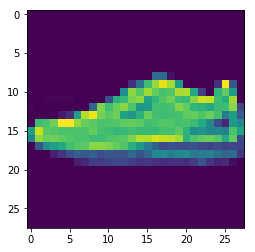

In [11]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [12]:
class_labels[int(y_train[50])]

'Sneaker'

CNN Model
- Define
- Compile
- Fit

In [13]:
batch_size = 1024
im_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [14]:
# Model specifications

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

W0708 04:05:21.435303 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 04:05:21.458766 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 04:05:21.468996 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 04:05:21.505928 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0708 0

In [15]:
# compile model

opt = Adam(lr=0.001)
cnn_model.compile(loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

W0708 04:05:21.659477 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 04:05:21.666183 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
# training the model

cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_validate, y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 411us/step - loss: 1.0166 - acc: 0.6757 - val_loss: 0.5674 - val_acc: 0.8042
Epoch 2/10
48000/48000 [==============================] - 18s 380us/step - loss: 0.5066 - acc: 0.8210 - val_loss: 0.4557 - val_acc: 0.8404
Epoch 3/10
48000/48000 [==============================] - 15s 320us/step - loss: 0.4340 - acc: 0.8480 - val_loss: 0.4041 - val_acc: 0.8587
Epoch 4/10
48000/48000 [==============================] - 17s 354us/step - loss: 0.3971 - acc: 0.8609 - val_loss: 0.3758 - val_acc: 0.8684
Epoch 5/10
48000/48000 [==============================] - 18s 374us/step - loss: 0.3683 - acc: 0.8715 - val_loss: 0.3571 - val_acc: 0.8752
Epoch 6/10
48000/48000 [==============================] - 18s 367us/step - loss: 0.3517 - acc: 0.8771 - val_loss: 0.3417 - val_acc: 0.8813
Epoch 7/10
48000/48000 [==============================] - 17s 357us/step - loss: 0.3382 - acc: 0.8816 - val_loss: 0.

In [17]:
# testing the model on test data

score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30887285923957825
Test accuracy: 0.8953


# A deeper CNN

In [18]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [19]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
cnn2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 35s 727us/step - loss: 0.9989 - acc: 0.6262 - val_loss: 0.5847 - val_acc: 0.7792
Epoch 2/10
48000/48000 [==============================] - 34s 709us/step - loss: 0.5601 - acc: 0.7854 - val_loss: 0.4685 - val_acc: 0.8242
Epoch 3/10
48000/48000 [==============================] - 34s 701us/step - loss: 0.4858 - acc: 0.8179 - val_loss: 0.4199 - val_acc: 0.8438
Epoch 4/10
48000/48000 [==============================] - 34s 700us/step - loss: 0.4398 - acc: 0.8371 - val_loss: 0.3797 - val_acc: 0.8610
Epoch 5/10
48000/48000 [==============================] - 34s 700us/step - loss: 0.4107 - acc: 0.8471 - val_loss: 0.3650 - val_acc: 0.8644
Epoch 6/10
48000/48000 [==============================] - 33s 695us/step - loss: 0.3888 - acc: 0.8572 - val_loss: 0.3399 - val_acc: 0.8764
Epoch 7/10
48000/48000 [==============================] - 34s 703us/step - loss: 0.3709 - acc: 0.8619 - val_loss: 0.

In [21]:
cnn2.optimizer.lr = 0.0001

cnn2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 34s 701us/step - loss: 0.3226 - acc: 0.8801 - val_loss: 0.2848 - val_acc: 0.8960
Epoch 2/10
48000/48000 [==============================] - 34s 701us/step - loss: 0.3143 - acc: 0.8847 - val_loss: 0.2836 - val_acc: 0.8958
Epoch 3/10
48000/48000 [==============================] - 34s 703us/step - loss: 0.3078 - acc: 0.8867 - val_loss: 0.2755 - val_acc: 0.8979
Epoch 4/10
48000/48000 [==============================] - 33s 693us/step - loss: 0.3002 - acc: 0.8906 - val_loss: 0.2781 - val_acc: 0.8966
Epoch 5/10
48000/48000 [==============================] - 34s 704us/step - loss: 0.2930 - acc: 0.8925 - val_loss: 0.2660 - val_acc: 0.9024
Epoch 6/10
48000/48000 [==============================] - 34s 699us/step - loss: 0.2842 - acc: 0.8943 - val_loss: 0.2696 - val_acc: 0.8983
Epoch 7/10
48000/48000 [==============================] - 33s 684us/step - loss: 0.2826 - acc: 0.8971 - val_loss: 0.

In [22]:
score = cnn2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2387670115172863
Test accuracy: 0.9125


# Model with 4 Conv Layers and Batch Norm

In [23]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [24]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=im_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

W0708 04:19:31.531980 140550804244288 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [25]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
cnn3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 249s 5ms/step - loss: 0.9473 - acc: 0.6868 - val_loss: 0.5016 - val_acc: 0.8168
Epoch 2/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.5724 - acc: 0.7924 - val_loss: 0.4306 - val_acc: 0.8442
Epoch 3/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.4956 - acc: 0.8227 - val_loss: 0.3894 - val_acc: 0.8580
Epoch 4/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.4478 - acc: 0.8386 - val_loss: 0.3596 - val_acc: 0.8698
Epoch 5/10
48000/48000 [==============================] - 247s 5ms/step - loss: 0.4193 - acc: 0.8510 - val_loss: 0.3380 - val_acc: 0.8767
Epoch 6/10
48000/48000 [==============================] - 247s 5ms/step - loss: 0.3891 - acc: 0.8620 - val_loss: 0.3566 - val_acc: 0.8723
Epoch 7/10
48000/48000 [==============================] - 248s 5ms/step - loss: 0.3698 - acc: 0.8697 - val_loss: 0.3277 - 

In [27]:
cnn3.optimizer.lr = 0.0001

In [28]:
cnn3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 248s 5ms/step - loss: 0.3180 - acc: 0.8854 - val_loss: 0.2868 - val_acc: 0.8976
Epoch 2/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.3084 - acc: 0.8893 - val_loss: 0.2761 - val_acc: 0.9008
Epoch 3/10
48000/48000 [==============================] - 247s 5ms/step - loss: 0.3008 - acc: 0.8938 - val_loss: 0.2688 - val_acc: 0.9042
Epoch 4/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.2928 - acc: 0.8963 - val_loss: 0.2601 - val_acc: 0.9077
Epoch 5/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.2857 - acc: 0.8978 - val_loss: 0.2590 - val_acc: 0.9087
Epoch 6/10
48000/48000 [==============================] - 247s 5ms/step - loss: 0.2787 - acc: 0.9010 - val_loss: 0.2533 - val_acc: 0.9108
Epoch 7/10
48000/48000 [==============================] - 245s 5ms/step - loss: 0.2755 - acc: 0.9023 - val_loss: 0.2621 - 

In [29]:
score = cnn3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23871485885977745
Test accuracy: 0.9148


With Data Augmentation

In [30]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.1, horizontal_flip=True)
batches = gen.flow(x_train, y_train, batch_size=batch_size)
val_batches = gen.flow(x_validate, y_validate, batch_size=batch_size)

In [33]:
cnn3.fit_generator(batches, steps_per_epoch=np.ceil(48000//batch_size), epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
46/46 [==============================] - 249s 5s/step - loss: 0.5807 - acc: 0.7955 - val_loss: 0.4984 - val_acc: 0.8222
Epoch 2/50
46/46 [==============================] - 247s 5s/step - loss: 0.5092 - acc: 0.8164 - val_loss: 0.4848 - val_acc: 0.8284
Epoch 3/50
46/46 [==============================] - 244s 5s/step - loss: 0.4874 - acc: 0.8251 - val_loss: 0.4696 - val_acc: 0.8274
Epoch 4/50
46/46 [==============================] - 246s 5s/step - loss: 0.4630 - acc: 0.8309 - val_loss: 0.4591 - val_acc: 0.8361
Epoch 5/50
46/46 [==============================] - 1971s 43s/step - loss: 0.4599 - acc: 0.8323 - val_loss: 0.4443 - val_acc: 0.8386
Epoch 6/50
46/46 [==============================] - 248s 5s/step - loss: 0.4432 - acc: 0.8401 - val_loss: 0.4174 - val_acc: 0.8482
Epoch 7/50
46/46 [==============================] - 248s 5s/step - loss: 0.4359 - acc: 0.8413 - val_loss: 0.4096 - val_acc: 0.8513
Epoch 8/50
46/46 [==============================] - 247s 5s/step - loss: 0.4305 -

In [34]:
score = cnn3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21089796236157418
Test accuracy: 0.9239
